# Inspiration
###  1 Convert the height and weight columns to numerical forms
### 2 Remove the unnecessary newline characters from all columns that have them.
### 3 Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!
### 4 'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers. For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc.
### 5 Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical
### 6 Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('fifa21 raw data v2.csv')

## Sub-Task 1 : convert foot to cm

In [5]:
df['Height final'] = df['Height']

In [6]:
def foot_cm(val):
    f = val.split("'")[0]
    i = val.split("'")[1].replace('"','')
    return ( (int(f)*12 + int(i)) * 2.54)

In [7]:
df['Height final'] = df['Height final'].apply(lambda x : foot_cm(x) if 'cm' not in x else x)

In [8]:
df['Height final'] = df['Height final'].apply(lambda x : x.replace('cm',"") if 'cm' in str(x) else x)

In [9]:
df['Height final'] = df['Height final'].apply(lambda x : int(x))

In [10]:
df.rename(columns={'Height final':'Height_cm'},inplace=True)

## Sub-Task 2 : convert lbs to kg

In [11]:
df['Weight_kg'] = df['Weight']


In [12]:
def lbs_kg(val):
    f = val.replace("lbs","")
    return ( int(int(f) * 0.45359237) )

In [13]:
df['Weight_kg'] = df['Weight_kg'].apply(lambda x : lbs_kg(x) if 'lbs' in x else int(x.replace('kg','')))

## Task 3 : players have been playing at a club for more than 10 years

In [14]:
df["Joined_year"] = df['Joined'].apply(lambda x : x.split(',')[1])

In [15]:
df["Joined_year"] = df["Joined_year"].str.strip()

In [16]:
df["Joined_year"] = df["Joined_year"].astype('int')

In [17]:
df["years_with_club"] = 2021 - df["Joined_year"]

In [18]:
df.loc[df["years_with_club"] >= 10]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,SHO,PAS,DRI,DEF,PHY,Hits,Height_cm,Weight_kg,Joined_year,years_with_club
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,92,91,95,38,65,771,170,72,2004,17
14,167495,M. Neuer,Manuel Neuer,https://cdn.sofifa.com/players/167/495/21_60.png,http://sofifa.com/player/167495/manuel-neuer/2...,Germany,34,89,89,\n\n\n\nFC Bayern München,...,87,91,89,57,86,118,193,92,2011,10
15,165153,K. Benzema,Karim Benzema,https://cdn.sofifa.com/players/165/153/21_60.png,http://sofifa.com/player/165153/karim-benzema/...,France,32,89,89,\n\n\n\nReal Madrid,...,85,81,86,40,76,216,185,81,2009,12
16,155862,Sergio Ramos,Sergio Ramos García,https://cdn.sofifa.com/players/155/862/21_60.png,http://sofifa.com/player/155862/sergio-ramos-g...,Spain,34,89,89,\n\n\n\nReal Madrid,...,70,76,73,88,85,212,184,82,2005,16
17,153079,S. Agüero,Sergio Agüero,https://cdn.sofifa.com/players/153/079/21_60.png,http://sofifa.com/player/153079/sergio-aguero/...,Argentina,32,89,89,\n\n\n\nManchester City,...,90,77,88,33,73,154,173,70,2011,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16519,248760,J. Popelard,John Popelard,https://cdn.sofifa.com/players/248/760/21_60.png,http://sofifa.com/player/248760/john-popelard/...,France,34,58,58,\n\n\n\nFC Chambly Oise,...,45,55,57,49,59,NaN,181,76,2010,11
16709,219936,M. Al Wakid,Mohammed Al Wakid,https://cdn.sofifa.com/players/219/936/21_60.png,http://sofifa.com/player/219936/mohammed-al-wa...,Saudi Arabia,28,57,57,\n\n\n\nAl Hilal,...,57,53,55,42,55,NaN,182,82,2009,12
17021,256950,J. Huysman,Jérémy Huysman,https://cdn.sofifa.com/players/256/950/21_60.png,http://sofifa.com/player/256950/jeremy-huysman...,France,31,57,57,\n\n\n\nUSL Dunkerque,...,26,30,30,59,67,NaN,188,84,2011,10
17073,102881,K. Stamatopoulos,Kyriakos Stamatopoulos,https://cdn.sofifa.com/players/102/881/21_60.png,http://sofifa.com/player/102881/kyriakos-stama...,Canada,40,57,57,\n\n\n\nAIK,...,52,54,56,33,57,NaN,188,80,2011,10


## Task 4 : 'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers

In [19]:
def value_to_float(x):
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
    else :
        return float(x)
    

In [20]:
df['Value_EUR'] = df['Value'].apply(lambda x : x.replace('€',''))

In [21]:
df['Value_EUR'] = df['Value_EUR'].apply(value_to_float)

In [22]:
df['Wage_EUR'] = df['Wage'].apply(lambda x : x.replace('€',''))

In [23]:
df['Wage_EUR'] = df['Wage_EUR'].apply(value_to_float)

## Task 5 : Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical


  #### W/F  SM IR

In [24]:
df['W/F_N'] = df['W/F'].str.replace('★','')
df['W/F_N'] = df['W/F_N'].str.strip()
df['W/F_N'] = df['W/F_N'].astype(int)

In [25]:
df['SM_N'] = df['SM'].str.replace('★','')
df['SM_N'] = df['SM_N'].str.strip()
df['SM_N'] = df['SM_N'].astype(int)

In [26]:
df['IR_N'] = df['IR'].str.replace('★','')
df['IR_N'] = df['IR_N'].str.strip()
df['IR_N'] = df['IR_N'].astype(int)

### 6 Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)

AxesSubplot(0.125,0.125;0.775x0.755)


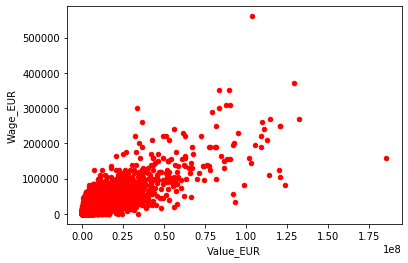

In [27]:
ax1 = df.plot(kind='scatter', x='Value_EUR', y='Wage_EUR', color='r',style='o')    

print(ax1)  # True

In [28]:
df.to_csv('fifa21 raw data after analyzing.csv')